<a href="https://colab.research.google.com/github/fafavio/analise_evasao_clientes_parte2/blob/main/evasao_clientes_parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛠️ Preparação dos Dados
[texto do link](https://)



In [20]:
import pandas as pd

# lendo arquivo tratado



df_evasao = pd.read_csv('/content/df_evasao_corrigido.csv' , sep = ';')
df_evasao

,Churn,SeniorCitizen,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingMovies,Contract,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias
0,no,0,9,yes,dsl,no,yes,no,yes,no,one year,mailed check,65.60,593.30,2.19
1,no,0,9,yes,dsl,no,no,no,no,yes,month-to-month,mailed check,59.90,542.40,2.00
2,yes,0,4,yes,fiber optic,no,no,yes,no,no,month-to-month,electronic check,73.90,280.85,2.46
3,yes,1,13,yes,fiber optic,no,yes,yes,no,yes,month-to-month,electronic check,98.00,1237.85,3.27
4,yes,1,3,yes,fiber optic,no,no,no,yes,no,month-to-month,mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,no,0,13,yes,dsl,yes,no,no,yes,no,one year,mailed check,55.15,742.90,1.84
7028,yes,0,22,yes,fiber optic,no,no,no,no,yes,month-to-month,electronic check,85.10,1873.70,2.84
7029,no,0,2,yes,dsl,no,yes,no,no,no,month-to-month,mailed check,50.30,92.75,1.68
7030,no,0,67,yes,dsl,yes,no,yes,yes,yes,two year,mailed check,67.85,4627.65,2.26


## Encoding

In [21]:
# vendo colunas categoricas

df_evasao.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   tenure            7032 non-null   int64  
 3   PhoneService      7032 non-null   object 
 4   InternetService   7032 non-null   object 
 5   OnlineSecurity    7032 non-null   object 
 6   OnlineBackup      7032 non-null   object 
 7   DeviceProtection  7032 non-null   object 
 8   TechSupport       7032 non-null   object 
 9   StreamingMovies   7032 non-null   object 
 10  Contract          7032 non-null   object 
 11  PaymentMethod     7032 non-null   object 
 12  Charges.Monthly   7032 non-null   float64
 13  Charges.Total     7032 non-null   float64
 14  Contas_Diarias    7032 non-null   float64
dtypes: float64(3), int64(2), object(10)
memory usage: 824.2+ KB


In [22]:


# Agora df_evasao é DataFrame de verdade
colunas_categoricas = df_evasao.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

# Criar o transformer
one_hot_enc = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), colunas_categoricas),
    remainder='passthrough'
)

# Aplicar o transformer no DataFrame original
dados_array = one_hot_enc.fit_transform(df_evasao)

# Transformar em DataFrame com nomes das colunas
dados = pd.DataFrame(dados_array, columns=one_hot_enc.get_feature_names_out())
dados = dados.astype(int)
dados.head()


,onehotencoder__Churn_no,onehotencoder__Churn_yes,onehotencoder__PhoneService_no,onehotencoder__PhoneService_yes,onehotencoder__InternetService_dsl,onehotencoder__InternetService_fiber optic,onehotencoder__InternetService_no,onehotencoder__OnlineSecurity_no,onehotencoder__OnlineSecurity_no internet service,onehotencoder__OnlineSecurity_yes,...,onehotencoder__Contract_two year,onehotencoder__PaymentMethod_bank transfer (automatic),onehotencoder__PaymentMethod_credit card (automatic),onehotencoder__PaymentMethod_electronic check,onehotencoder__PaymentMethod_mailed check,remainder__SeniorCitizen,remainder__tenure,remainder__Charges.Monthly,remainder__Charges.Total,remainder__Contas_Diarias
0,1,0,0,1,1,0,0,1,0,0,...,0,0,0,0,1,0,9,65,593,2
1,1,0,0,1,1,0,0,1,0,0,...,0,0,0,0,1,0,9,59,542,2
2,0,1,0,1,0,1,0,1,0,0,...,0,0,0,1,0,0,4,73,280,2
3,0,1,0,1,0,1,0,1,0,0,...,0,0,0,1,0,1,13,98,1237,3
4,0,1,0,1,0,1,0,1,0,0,...,0,0,0,0,1,1,3,83,267,2


## Verificação da Proporção de Evasão

In [23]:
# usando um value_counts()

contagem_classes = df_evasao['Churn'].value_counts()

Churn
no     0.734215
yes    0.265785
Name: proportion, dtype: float64


(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

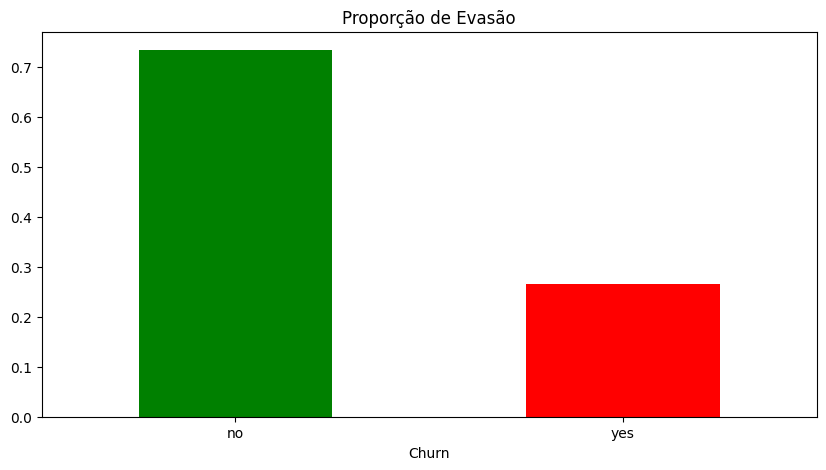

In [24]:
#calculando a proporção
proporcao_classes = df_evasao['Churn'].value_counts(normalize=True)
print(proporcao_classes)
import matplotlib.pyplot as plt


proporcao_classes.plot( kind = 'bar', color =['green','red'], figsize=(10,5), title= 'Proporção de Evasão')
plt.xticks(rotation=0)
#há um desequilíbrio mas não é tão discrepante

## Balanceamento de classes:

In [25]:
from collections import Counter
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# Separando os dados em recursos (X) e alvo (y)
X = df_evasao.drop('Churn', axis=1)  # tudo menos a coluna Churn
y = df_evasao['Churn']               # só a coluna Churn

In [26]:
# Transformando colunas categóricas em números (se houver)
X = pd.get_dummies(X, drop_first=True)
X

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Contas_Diarias,PhoneService_yes,InternetService_fiber optic,InternetService_no,OnlineSecurity_no internet service,OnlineSecurity_yes,...,DeviceProtection_yes,TechSupport_no internet service,TechSupport_yes,StreamingMovies_no internet service,StreamingMovies_yes,Contract_one year,Contract_two year,PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check
0,0,9,65.60,593.30,2.19,True,False,False,False,False,...,False,False,True,False,False,True,False,False,False,True
1,0,9,59.90,542.40,2.00,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,4,73.90,280.85,2.46,True,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
3,1,13,98.00,1237.85,3.27,True,True,False,False,False,...,True,False,False,False,True,False,False,False,True,False
4,1,3,83.90,267.40,2.80,True,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,13,55.15,742.90,1.84,True,False,False,False,True,...,False,False,True,False,False,True,False,False,False,True
7028,0,22,85.10,1873.70,2.84,True,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
7029,0,2,50.30,92.75,1.68,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7030,0,67,67.85,4627.65,2.26,True,False,False,False,True,...,True,False,True,False,True,False,True,False,False,True


In [27]:
# 1) UNDERSAMPLING

undersample = RandomUnderSampler(random_state=42)
X_under, y_under = undersample.fit_resample(X, y)
print("Distribuição após undersampling:", Counter(y_under))

Distribuição após undersampling: Counter({'no': 1869, 'yes': 1869})


In [28]:
# 2) OVERSAMPLING

oversample = RandomOverSampler(random_state=42)
X_over, y_over = oversample.fit_resample(X, y)
print("Distribuição após oversampling:", Counter(y_over))

Distribuição após oversampling: Counter({'no': 5163, 'yes': 5163})


In [29]:
#3) SMOTE

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
print("Distribuição após SMOTE:", Counter(y_smote))

Distribuição após SMOTE: Counter({'no': 5163, 'yes': 5163})


In [30]:
# Dividindo os dados em treino e teste (opcional)

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)
print("Treino:", X_train.shape, "Teste:", X_test.shape)

Treino: (7228, 23) Teste: (3098, 23)


## Normalização ou Padronização (se necessário)

In [31]:
# Selecionando apenas as colunas numéricas
colunas_numericas = X_train.select_dtypes(include=['int64', 'float64']).columns
print("\nColunas numéricas detectadas:", list(colunas_numericas))



Colunas numéricas detectadas: ['SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total', 'Contas_Diarias']


In [32]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalização (0 a 1)
normalizador = MinMaxScaler()
X_train_normalizado = X_train.copy()
X_train_normalizado[colunas_numericas] = normalizador.fit_transform(X_train[colunas_numericas])

In [33]:
# Padronização (média 0, desvio padrão 1)
padronizador = StandardScaler()
X_train_padronizado = X_train.copy()
X_train_padronizado[colunas_numericas] = padronizador.fit_transform(X_train[colunas_numericas])

In [34]:
# Comparação dos resultados
#
print("\nExemplo de valores originais:\n", X_train[colunas_numericas].head())
print("\nApós Normalização (0 a 1):\n", X_train_normalizado[colunas_numericas].head())
print("\nApós Padronização (média 0, desvio 1):\n", X_train_padronizado[colunas_numericas].head())


Exemplo de valores originais:
       SeniorCitizen  tenure  Charges.Monthly  Charges.Total  Contas_Diarias
3169              0       4            19.75          78.30            0.66
68                0      71            58.25        4145.90            1.94
1168              1       5            89.50         477.70            2.98
48                0       1            44.30          44.30            1.48
1053              0       1            62.05          62.05            2.07

Após Normalização (0 a 1):
       SeniorCitizen    tenure  Charges.Monthly  Charges.Total  Contas_Diarias
3169            0.0  0.042254         0.010511       0.006866        0.012012
68              0.0  0.985915         0.395896       0.476240        0.396396
1168            1.0  0.056338         0.708709       0.052954        0.708709
48              0.0  0.000000         0.256256       0.002943        0.258258
1053            0.0  0.000000         0.433934       0.004991        0.435435

Após Padroniza

# 🤖 Modelagem Preditiva

## Separação de dados:

In [35]:
from sklearn.model_selection import train_test_split

# Usando dados balanceados pelo SMOTE (já aplicados antes)
X_train, X_test, y_train, y_test = train_test_split(
    X_smote, y_smote, test_size=0.3, random_state=42
)

print("Treino:", X_train.shape)
print("Teste:", X_test.shape)

Treino: (7228, 23)
Teste: (3098, 23)


## Criação de Modelos:

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

# Normalizando os dados para regressão logística
normalizador = MinMaxScaler()
X_train_norm = X_train.copy()
X_test_norm = X_test.copy()
X_train_norm[colunas_numericas] = normalizador.fit_transform(X_train[colunas_numericas])
X_test_norm[colunas_numericas] = normalizador.transform(X_test[colunas_numericas])



# Modelo 2: Random Forest
modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [37]:
# Modelo 1: Regressão Logística
modelo_log = LogisticRegression(max_iter=1000)
modelo_log.fit(X_train_norm, y_train)

LogisticRegression(max_iter=1000)

In [38]:

# Modelo 2: Random Forest
modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Avaliação dos Modelos:

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Converter y_train e y_test para 0 e 1
y_train_bin = y_train.map({'no':0, 'yes':1})
y_test_bin = y_test.map({'no':0, 'yes':1})

# Treinando modelos novamente
modelo_log.fit(X_train_norm, y_train_bin)
modelo_rf.fit(X_train, y_train_bin)

# Função de avaliação


def avaliar_modelo(modelo, X_teste, y_teste):
    y_pred = modelo.predict(X_teste)
    print("Acurácia:", accuracy_score(y_teste, y_pred))
    print("Precisão:", precision_score(y_teste, y_pred))
    print("Recall:", recall_score(y_teste, y_pred))
    print("F1-Score:", f1_score(y_teste, y_pred))
    print("\nMatriz de Confusão:\n", confusion_matrix(y_teste, y_pred))
    print("\nRelatório:\n", classification_report(y_teste, y_pred))

# Chamando avaliações
print("🔹 Avaliando Regressão Logística")
avaliar_modelo(modelo_log, X_test_norm, y_test_bin)

print("\n🔹 Avaliando Random Forest")
avaliar_modelo(modelo_rf, X_test, y_test_bin)


🔹 Avaliando Regressão Logística
Acurácia: 0.7924467398321497
Precisão: 0.7707286432160804
Recall: 0.815282392026578
F1-Score: 0.7923797223119148

Matriz de Confusão:
 [[1228  365]
 [ 278 1227]]

Relatório:
               precision    recall  f1-score   support

           0       0.82      0.77      0.79      1593
           1       0.77      0.82      0.79      1505

    accuracy                           0.79      3098
   macro avg       0.79      0.79      0.79      3098
weighted avg       0.79      0.79      0.79      3098


🔹 Avaliando Random Forest
Acurácia: 0.8340865074241446
Precisão: 0.8170185540627
Recall: 0.8485049833887043
F1-Score: 0.8324641460234681

Matriz de Confusão:
 [[1307  286]
 [ 228 1277]]

Relatório:
               precision    recall  f1-score   support

           0       0.85      0.82      0.84      1593
           1       0.82      0.85      0.83      1505

    accuracy                           0.83      3098
   macro avg       0.83      0.83      0.83     

# 📋  Interpretação e Conclusões

## Análise de Importância das Variáveis

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# X = variáveis independentes
# y = variável alvo (ex: churn)

# 1. Regressão Logística
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X, y)
coef_importancia = pd.Series(log_reg.coef_[0], index=X.columns)
print("Coeficientes - Regressão Logística:")
print(coef_importancia.sort_values(ascending=False))



Coeficientes - Regressão Logística:
InternetService_fiber optic              0.330215
PaymentMethod_electronic check           0.306325
SeniorCitizen                            0.264442
StreamingMovies_yes                      0.033249
Charges.Monthly                          0.018235
Contas_Diarias                           0.014585
Charges.Total                            0.000353
tenure                                  -0.061269
TechSupport_no internet service         -0.069237
InternetService_no                      -0.069237
OnlineSecurity_no internet service      -0.069237
OnlineBackup_no internet service        -0.069237
StreamingMovies_no internet service     -0.069237
DeviceProtection_no internet service    -0.069237
PaymentMethod_mailed check              -0.096696
PaymentMethod_credit card (automatic)   -0.107575
DeviceProtection_yes                    -0.162568
OnlineBackup_yes                        -0.253774
TechSupport_yes                         -0.487948
OnlineSecurity

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
# 2. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
rf_importancia = pd.Series(rf.feature_importances_, index=X.columns)
print("\nImportância das variáveis - Random Forest:")
print(rf_importancia.sort_values(ascending=False))


Importância das variáveis - Random Forest:
Charges.Total                            0.212072
tenure                                   0.176868
Charges.Monthly                          0.168534
Contas_Diarias                           0.139499
InternetService_fiber optic              0.035965
PaymentMethod_electronic check           0.034858
Contract_two year                        0.033654
OnlineSecurity_yes                       0.024187
Contract_one year                        0.022783
TechSupport_yes                          0.022642
SeniorCitizen                            0.019315
OnlineBackup_yes                         0.019204
DeviceProtection_yes                     0.017446
StreamingMovies_yes                      0.013981
PaymentMethod_credit card (automatic)    0.012355
PaymentMethod_mailed check               0.011616
OnlineBackup_no internet service         0.007857
OnlineSecurity_no internet service       0.005888
PhoneService_yes                         0.004873
Stream

In [42]:
# 3. SVM (coeficientes dos vetores de suporte)
svm = SVC(kernel="linear")
svm.fit(X, y)
svm_coef = pd.Series(svm.coef_[0], index=X.columns)
print("\nCoeficientes - SVM:")
print(svm_coef.sort_values(ascending=False))



Coeficientes - SVM:
SeniorCitizen                             1.493274
PaymentMethod_electronic check            0.653317
DeviceProtection_no internet service      0.478922
OnlineSecurity_no internet service        0.478922
OnlineBackup_no internet service          0.478922
InternetService_no                        0.478922
TechSupport_no internet service           0.478922
StreamingMovies_no internet service       0.478922
StreamingMovies_yes                       0.255694
Charges.Monthly                           0.125947
Contas_Diarias                            0.108638
Charges.Total                            -0.003308
PaymentMethod_mailed check               -0.027056
tenure                                   -0.046516
PaymentMethod_credit card (automatic)    -0.203835
DeviceProtection_yes                     -0.254605
InternetService_fiber optic              -0.512398
OnlineBackup_yes                         -1.166288
OnlineSecurity_yes                       -1.848203
TechSuppor

In [43]:
# 4. KNN (análise via distâncias)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
# KNN não tem importância direta -> análise baseada em distâncias
print("\nNo KNN, a relevância das variáveis é interpretada pelo impacto na proximidade entre os pontos.")


No KNN, a relevância das variáveis é interpretada pelo impacto na proximidade entre os pontos.


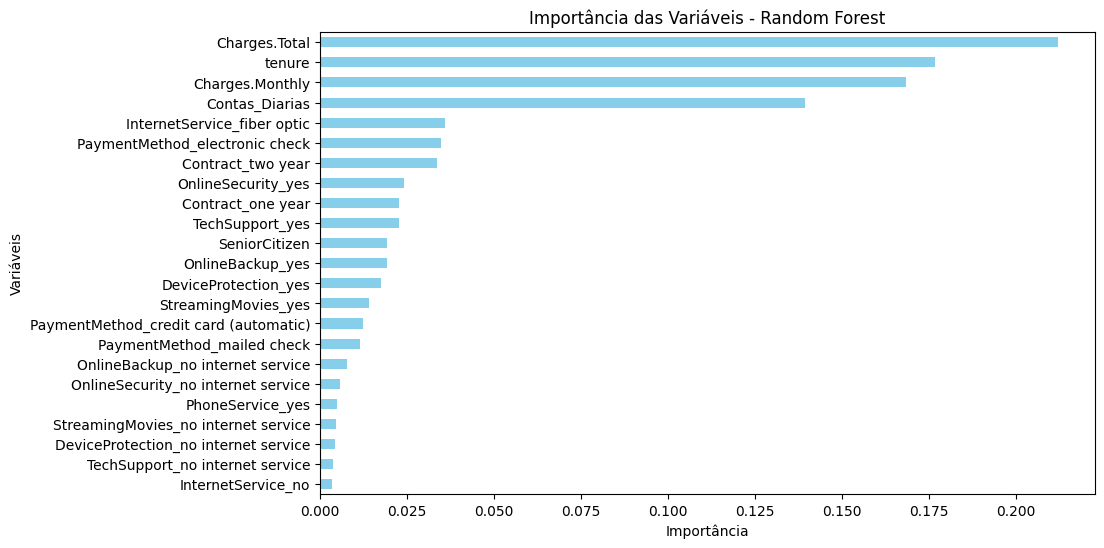

In [44]:
# --- Visualização: Random Forest como exemplo ---
plt.figure(figsize=(10,6))
rf_importancia.sort_values().plot(kind='barh', color='skyblue')
plt.title("Importância das Variáveis - Random Forest")
plt.xlabel("Importância")
plt.ylabel("Variáveis")
plt.show()